<a href="https://colab.research.google.com/github/jjlopezre/PDS/blob/main/Entrega1_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procesamiento Digital De Señales

Juan José López Rendón

1. Consult and describe the mathematical model, implementation and operational considerations of the fast fourier transform algorithm - FFT

* The Fast Fourier Transform (FFT) is an algorithm that determines the Discrete Fourier Transform of an input significantly faster than calculating it directly. The FFT reduces the number of calculations required for a problem of size N from O (N ^ 2) to O (NlogN).
The FFT algorithm: Uses the fundamental principle of "divide and conquer", that is, by dividing a problem into smaller problems with a similar structure, the original problem can be successfully solved by solving each of the smaller problems. Take advantage of periodicity and symmetry properties
Applying this division of problems we have to decompose the transformation to be treated into simpler ones and these in turn until we reach transforms of 2 elements where k can take the values ​​0 and 1. Once the simplest transforms have been solved, they must be grouped in others of higher level that must be solved again and so on until reaching the highest level. At the end of this process, the results obtained must be rearranged.
At the end of all algorithm calculations it is possible to reduce the time required to calculate the Fourier Transform by a factor of 2, as long as N is a power of 2

2. Comparative analysis of the execution times of the discrete Fourier Transform - DFT vs the FFT as a function of the signal size. Test for different values ​​of N (signal length).

In [ ]:
import numpy as np
import timeit
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [ ]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [ ]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)




10 loops, best of 5: 125 ms per loop
The slowest run took 4.83 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 17.6 µs per loop


3. Make the exercises proposed in the .ipynb notebooks in the folder

#### Example - Zero-Padding

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


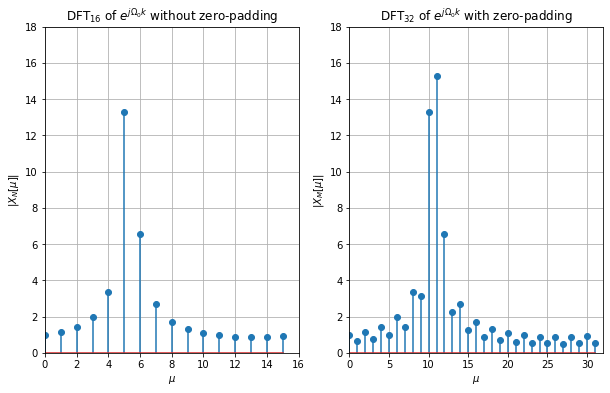

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 16  # length of the signal
M = 32  # length of zero-padded signal
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)
# DFT of the zero-padded exponential signal
xM = np.concatenate((xN, np.zeros(M-N)))
XM = np.fft.fft(xM)


# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ without zero-padding' %N)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])
plt.grid()

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'DFT$_{%d}$ of $e^{j \Omega_0 k}$ with zero-padding' %M)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18])
plt.grid()

**Exercise**

* Check the two spectra carefully for relations. Are there common coefficients for the case $M = 2 N$?
* Increase the length `M` of the zero-padded signal $x_M[k]$. Can you gain additional information from the spectrum?

Solution:
* with twice the sampling steps the probability of approaching the center of the main lobe will only be slightly improved but the other steps will remain the same simply duplicated as a longer zero fill.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


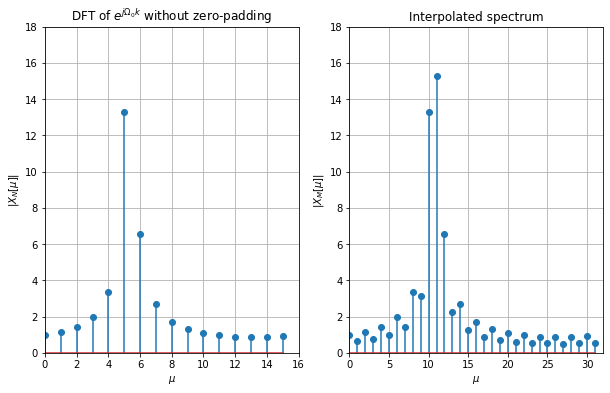

In [ ]:
N = 16  # length of the signal
M = 32  # number of points for interpolated DFT
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal


# periodic sinc function
def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)

# DFT of the exponential signal
xN = np.exp(1j*Om0*np.arange(N))
XN = np.fft.fft(xN)

# interpolation of DFT coefficients
XM = np.asarray(np.zeros(M), dtype=complex)
for mu in np.arange(M):
    Omd = 2*np.pi/M*mu-2*np.pi*np.arange(N)/N
    interpolator = psinc(Omd, N) * np.exp(-1j*Omd*(N-1)/2)
    XM[mu] = np.sum(XN * interpolator)

# plot spectra
plt.figure(figsize = (10, 6))

plt.subplot(121)
plt.stem(np.arange(N),np.abs(XN))
plt.title(r'DFT of $e^{j \Omega_0 k}$ without zero-padding')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_N[\mu]|$')
plt.axis([0, N, 0, 18])
plt.grid()

plt.subplot(122)
plt.stem(np.arange(M),np.abs(XM))
plt.title(r'Interpolated spectrum')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$|X_M[\mu]|$')
plt.axis([0, M, 0, 18])
plt.grid()

**Exercise**

* Compare the interpolated spectrum to the spectrum with zero padding from the first example.
* Estimate the frequency $\Omega_0$ of the exponential signal from the interpolated spectrum. How could you further increase the accuracy of your estimate?

solution:
* The interpolated spectrum and the zero-filled spectrum are the same
* The estimated frequency from the interpolated spectrum is $\Omega_0=\frac{2\pi}{M}\mu=\frac{2\pi}{32}\cdot11$. If the number of points in the DFT is increased, a better resolution is obtained since it has more precision from the steps to the maximum values ​​of the lobes.



In [ ]:
N = 128  # length of the signal
Om0 = 5.33*(2*np.pi/N)  # frequency of exponential signal

# generate harmonic signal
k = np.arange(N)
x = np.exp(1j*Om0*np.arange(N))


def estimate_frequency_amplitude(x, P):
    # perform zero-padding and DFT
    xM = np.concatenate((x, np.zeros(P)))
    XM = np.fft.fft(xM)

    # estimate frequency/amplitude of harmonic signal
    mu_max = np.argmax(abs(XM))
    amplitude = 1/N * abs(XM[mu_max])

    # print results
    Om = np.fft.fftfreq(N+P, 1/(2*np.pi))
    print('Normalized frequency of signal: {0:1.4f} (real) / {1:1.4f} (estimated) / {2:1.4f} (absolute error)'.format(Om0, Om[mu_max], abs(Om0 - Om[mu_max])))
    print('Amplitude of signal: {0:1.4f} (real) / {1:1.4f} (estimated) / {2:2.2f} dB (magnitude error)'.format(1, amplitude, 20*np.log10(abs(1/amplitude))))

In [ ]:
estimate_frequency_amplitude(x, 0)

Normalized frequency of signal: 0.2616 (real) / 0.2454 (estimated) / 0.0162 (absolute error)
Amplitude of signal: 1.0000 (real) / 0.8303 (estimated) / 1.62 dB (magnitude error)


In [ ]:
estimate_frequency_amplitude(x, 15*N)

Normalized frequency of signal: 0.2616 (real) / 0.2608 (estimated) / 0.0009 (absolute error)
Amplitude of signal: 1.0000 (real) / 0.9995 (estimated) / 0.00 dB (magnitude error)


**Exercise**

* What is the maximum error that can occur when estimating the frequency from the maximum of the (zero-padded) magnitude spectrum?

Solution: The maximum absolute error occurs if the maximum in the DTFT of the signal is in between two adjacent bins $\mu$ of the DFT. Since the DTFT is sampled at $\Omega = \frac{2 \pi}{M}$ to derive the DFT, the maximum absolute error is given by $\frac{\pi}{M}$ where $M$ denotes the length of the zero-padded signal/DFT.
* With a greater number of points $a.N$, there will be a smaller absolute error that guarantees a better resolution.

### Window

In [ ]:
import scipy.signal as sig
def dft_signal_mixture_window(N, A1, P1, A2, P2, w):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    # window applied to the signal
    
    # generate the signal mixture
    Om0_1 = P1*(2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2*(2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)
    x = x * w

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


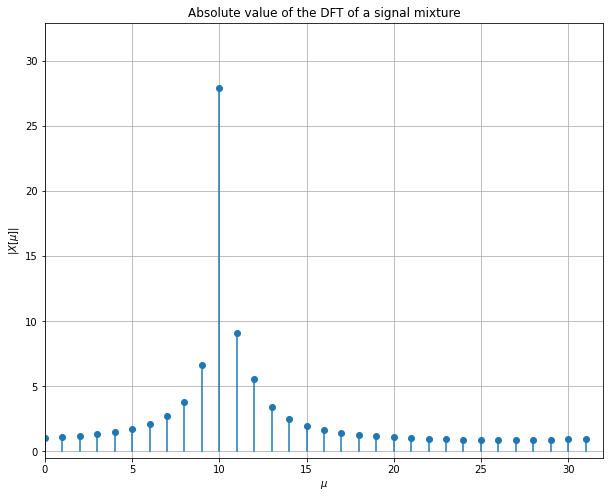

In [ ]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 11.2, np.ones(32))#np.blackman(32))

**Exercise**

* Examine the effect of the other window functions for small/large frequency and level differences. What window function is best suited for what situation?

Solution: 
* After making tests with different comparisons in frequency and levels in each of the proposed windows, it is determined that the rectangular one is the most suitable for identifying signals with close frequencies and with comparable amplitudes. and it was observed that in the windows with the greatest drop in the lateral lobes, they allow the identification of signals with quite different or distant frequencies and amplitudes.

##Leak effect

**Exercise**

* Change the frequency `Om0` of the signal and rerun the example. How does the magnitude spectrum change?
* Change the length `N` of the signal and rerun the example. How does the magnitude spectrum change?



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Om0 = 1  # frequency of exponential signal
N = 32  # length of signal

@interact(Om0=(0, 10.8, 0.5))
def changef(Om0):
    Om = np.linspace(-np.pi, np.pi, num=1024)
    XN = np.exp(-1j * (Om-Om0) * (N-1) / 2) * (np.sin(N * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))
    plt.figure(figsize = (10, 8))
    plt.plot(Om, abs(XN), 'r')
    plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X_N(e^{j \Omega})|$')
    plt.axis([-np.pi, np.pi, -0.5, N+5])
    plt.grid()






interactive(children=(FloatSlider(value=5.0, description='Om0', max=10.8, step=0.5), Output()), _dom_classes=(…

In [ ]:

@interact(N0=(0, 100, 10))
def changef(N0):
    Om = np.linspace(-np.pi, np.pi, num=1024)
    XN = np.exp(-1j * (Om-Om0) * (N0-1) / 2) * (np.sin(N0 * (Om-Om0) / 2)) / (np.sin((Om-Om0) / 2))
    plt.figure(figsize = (10, 8))
    plt.plot(Om, abs(XN), 'r')
    plt.title(r'Absolute value of the DTFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X_N(e^{j \Omega})|$')
    plt.axis([-np.pi, np.pi, -0.5, N0+5])
    plt.grid()

interactive(children=(IntSlider(value=50, description='N0', step=10), Output()), _dom_classes=('widget-interac…

Thanks to the interactive you can observe the changes in the magnitude of the spectrum and conclude:
The maximum value is found where the frequency is $ \Omega_0 $ the magnitude of the signal moves with the main lobe always located at $ \Omega_0 $.
If the value of N increases, the main lobe will be narrower and if it decreases the lobe will be wider



**Exercise**

* Change the periodicity `P` of the exponential signal and rerun the example. What happens if the periodicity is an integer? Why?
* Change the length `N` of the DFT? How does the spectrum change?
* What conclusions can be drawn for the analysis of a single exponential signal by the DFT?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


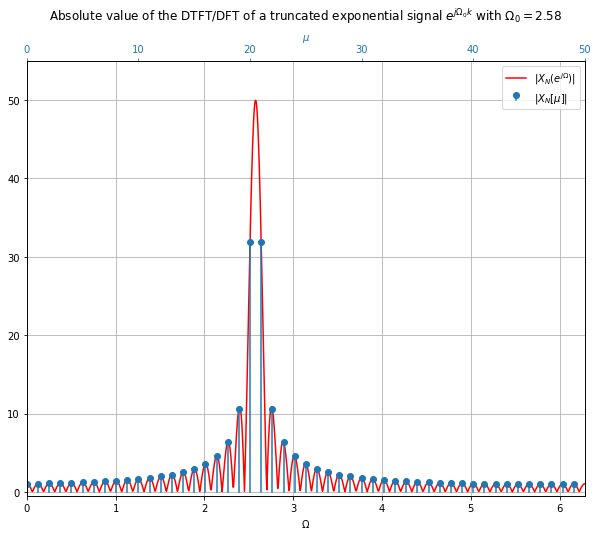

In [ ]:
N = 50  # length of the signal
P = 20.5  # periodicity of the exponential signal
Om0 = P * (2*np.pi/N)  # frequency of exponential signal


# truncated exponential signal
k = np.arange(N)
x = np.exp(1j*Om0*k)

# DTFT of finite length exponential signal (analytic)
Om = np.linspace(0, 2*np.pi, num=1024)
Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

# DFT of the exponential signal by FFT
X = np.fft.fft(x)
mu = np.arange(N) * 2*np.pi/N

# plot spectra
plt.figure(figsize = (10, 8))
ax1 = plt.gca()

plt.plot(Om, abs(Xw), 'r', label=r'$|X_N(e^{j \Omega})|$')
plt.stem(mu, abs(X), label=r'$|X_N[\mu]|$', basefmt=' ')
plt.ylim([-0.5, N+5]);
plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0, y=1.08)
plt.legend()

ax1.set_xlabel(r'$\Omega$')
ax1.set_xlim([Om[0], Om[-1]])
ax1.grid()

ax2 = ax1.twiny()
ax2.set_xlim([0, N])
ax2.set_xlabel(r'$\mu$', color='C0')
ax2.tick_params('x', colors='C0')

In [ ]:
#N = 50  # length of the signal
@interact(N=(0, 100, 10))
def changel(N):
  P = 10.33  # periodicity of the exponential signal
  Om0 = P * (2*np.pi/N)  # frequency of exponential signal


  # truncated exponential signal
  k = np.arange(N)
  x = np.exp(1j*Om0*k)

  # DTFT of finite length exponential signal (analytic)
  Om = np.linspace(0, 2*np.pi, num=1024)
  Xw = np.exp(-1j*(Om-Om0)*(N-1)/2)*(np.sin(N*(Om-Om0)/2))/(np.sin((Om-Om0)/2))

  # DFT of the exponential signal by FFT
  X = np.fft.fft(x)
  mu = np.arange(N) * 2*np.pi/N

  # plot spectra
  plt.figure(figsize = (10, 8))
  ax1 = plt.gca()

  plt.plot(Om, abs(Xw), 'r', label=r'$|X_N(e^{j \Omega})|$')
  plt.stem(mu, abs(X), label=r'$|X_N[\mu]|$', basefmt=' ')
  plt.ylim([-0.5, N+5]);
  plt.title(r'Absolute value of the DTFT/DFT of a truncated exponential signal $e^{j \Omega_0 k}$ with $\Omega_0=$%2.2f' %Om0, y=1.08)
  plt.legend()

  ax1.set_xlabel(r'$\Omega$')
  ax1.set_xlim([Om[0], Om[-1]])
  ax1.grid()

  ax2 = ax1.twiny()
  ax2.set_xlim([0, N])
  ax2.set_xlabel(r'$\mu$', color='C0')
  ax2.tick_params('x', colors='C0')

interactive(children=(IntSlider(value=50, description='N', step=10), Output()), _dom_classes=('widget-interact…

Solution: 
* if the periodicity is an integer, the step will be located centered on the maximum of the main lobe. with the interactive it is observed how the spectrum samples change,
if N is smaller, the contributions are not enough to carry out the adequate sampling of the signal, that is, there is more distance between the samples and there are fewer contributions in the spectrum, which we call the leakage effect, which affects the resolution.

#SHORT TIME FT

###Spectrogram

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2021-04-07 20:04:21--  https://docs.google.com/uc?export=download&confirm=&id=14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X
Resolving docs.google.com (docs.google.com)... 142.250.148.138, 142.250.148.100, 142.250.148.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.148.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-1o-docs.googleusercontent.com/docs/securesc/mqt41cr1j6d14i3oooldvtk1dcllah2d/5h3u92gqis3plqicmj1nihblpnvcm36u/1617825825000/09173029842254050324/04491947867077929583Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download [following]
--2021-04-07 20:04:23--  https://doc-08-1o-docs.googleusercontent.com/docs/securesc/mqt41cr1j6d14i3oooldvtk1dcllah2d/5h3u92gqis3plqicmj1nihblpnvcm36u/1617825825000/09173029842254050324/04491947867077929583Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download
Resolving doc-08-1o-docs.googleusercontent.com (doc-08-1o-docs.googleusercontent.com)... 142.250.148.132, 2607:f8b0:4001:c54::84
Connectin

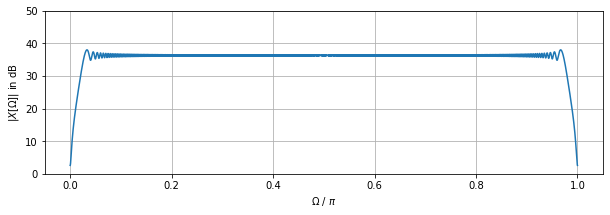

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 8192  # length of the signal

# generate signal
k = np.arange(N)
x = sig.chirp(k, 0.01, N, .49)

# compute and plot magnitude spectrum
plt.figure(figsize = (10, 3))
f = np.fft.rfftfreq(N, 1/2)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x))))
plt.xlabel(r'$\Omega$ / $\pi$')
plt.ylabel(r'$|X[\Omega]|$ in dB')
plt.ylim([0, 50])
plt.grid()

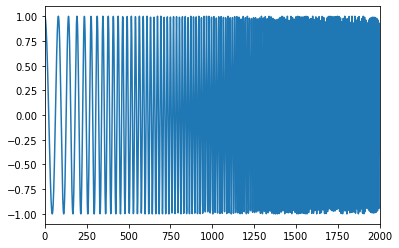

In [ ]:
plt.plot(x)
plt.xlim([0,2000])
plt.show()

In [ ]:
L = 256  # length of one segment
@interact(L=(150, 1024, 100))
def changel(L):
  overlap = 128  # overlap between segments

  plt.figure(figsize = (10, 5))
  plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
  plt.xlabel(r'$n$')
  plt.ylabel(r'$\Omega$ / $\pi$')
  cb = plt.colorbar()
  cb.set_label(r'$|X[\Omega,n]|$ in dB')
  plt.autoscale(tight=True)


interactive(children=(IntSlider(value=550, description='L', max=1024, min=150, step=100), Output()), _dom_clas…

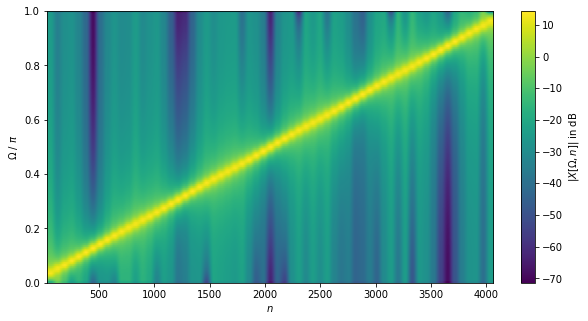

In [ ]:
L = 256  # length of one segment

overlap = 128  # overlap between segments

plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=2, window = np.ones(L),  noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)

**Exercise**

* Which spectral properties of the chirp signal can be concluded from the magnitude spectrum and the spectrogram?
* Change the segment length `L` of the spectrogram and the overlap `overlap` between segments. Rerun the example. What changes?
* Change the window function used for the spectrogram by extending the call to `plt.specgram` by the parameter `window`. For instance add `window = np.ones(L)` for the rectangular window.

Solution:
* Frequency energy change information over time can be evidenced in the short-time FT while in the DFT theses changes can't be seen over time.
* the resolution would change if there are more points chosen in the segment then will be larger pieces of signal with less resolution, the smaller the thinner pieces will be the resolution.
* Cleaner or sharper jumps depending on the size of the overlap. it will have more or less sharpness. Keep in mind that regarding the size of the samples if you want to see faster or slower frequencies, the size plays an important role, when taking Fourier the size remains at the same points in time, then it alters the resolution in frequency therefore higher resolution in frequency and vice versa.

In [ ]:
!pip install --upgrade soundfile

Requirement already up-to-date: soundfile in /usr/local/lib/python3.7/dist-packages (0.10.3.post1)


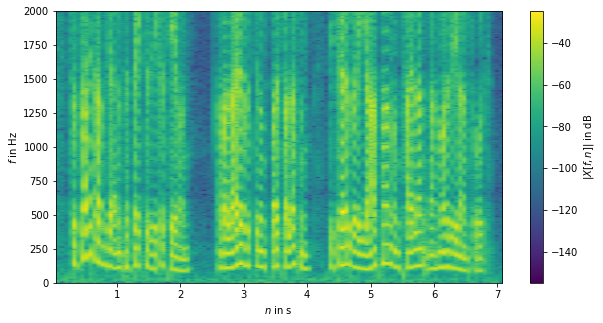

In [ ]:
import soundfile as sf

L = 1024  # length of one segment
overlap = 512  # overlap between segments

# read speech signal from file
x, fs = sf.read('data/speech_8k.wav')
x = x/np.max(np.abs(x))

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)
plt.ylim([0, 2000]);

**Exercise**

* A speech signal exhibits a specific spectral structure. What insights can you gain from the spectrum above?
* Change the segment length and overlap of the STFT. How does the spectrogram change?

Solution: the specific spectral structure for the signal of the example in case of a vowel speech signal. the formants are in vowels and this periodic signal has a characteristic form. This is possible because each sound of human speech has a characteristic mark of formants, that is, it makes a different distribution of sound energy between the different formants, which allows them to be classified or categorized.

